# Opinion dynamics over discourse sheaves

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.linalg import null_space

from builder import SheafBuilder, SimplicialSheafBuilder
from models import SheafDynamic, SimplicialSheafDynamic
from visualization import opinion_trajectory_plot, simplicial_opinion_trajectory_plot

## Constant sheaves with stalk equal to $\mathbb{R}^n$ on each vertex and node

### Opinion diffusion via Laplacian heat equation 

In [2]:
sheaf = SheafBuilder(7, 5, constant = True, seed = None)

x0 = sheaf.initial_state()
x_null = sheaf.null_space_projector(x0)

dynamic = SheafDynamic(
    sheaf.L_f, 
    sheaf.B, 
    0.1, 
    0.5, 
    sheaf.edges, 
    sheaf.V, 
    sheaf.d, 
    x0)

In [3]:
sheaf.edges

[(0, 4),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 5),
 (3, 6),
 (5, 6)]

In [4]:
trajectories_1 = dynamic.privateOpinionDynamicSolver()

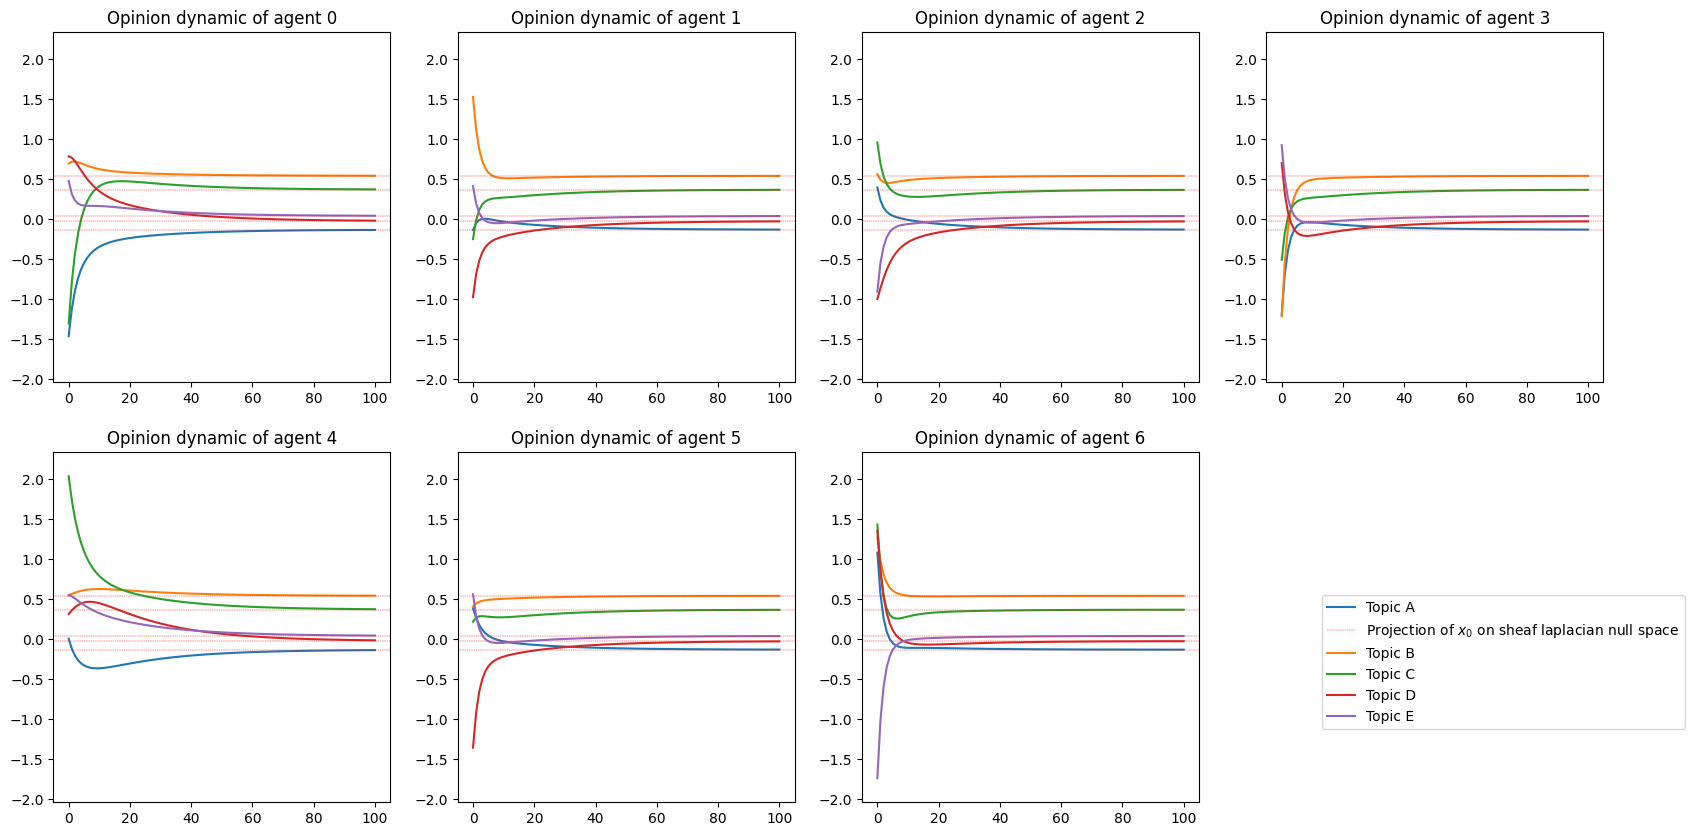

In [5]:
opinion_trajectory_plot(trajectories_1, dynamic.time_points, sheaf.d, range(sheaf.V), x_null)

### Modeling stubborn agents requires just restriction over the dynamics

In [6]:
U = np.random.choice(7, 3, replace = False)
sheaf = SheafBuilder(7, 5, constant = True, stubborn = U, seed = None)

x0 = sheaf.initial_state()
x_null = sheaf.null_space_projector(x0)

dynamic = SheafDynamic(
    sheaf.L_f, 
    sheaf.B, 
    0.1, 
    0.5, 
    sheaf.edges, 
    sheaf.V, 
    sheaf.d, 
    x0,
    U = U)

In [7]:
trajectories_2 = dynamic.privateOpinionDynamicSolver()

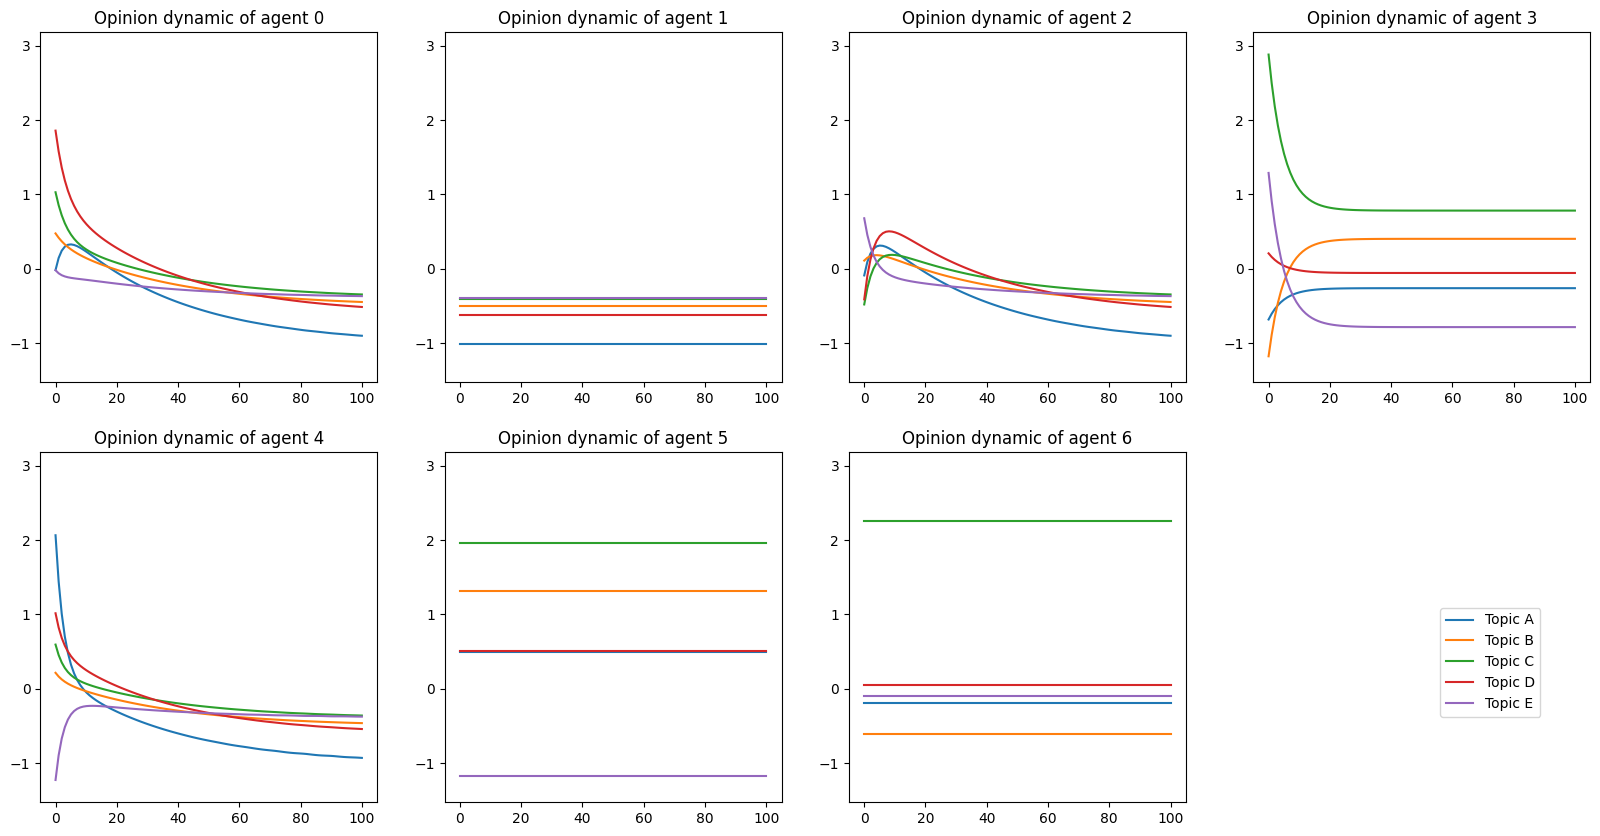

In [8]:
opinion_trajectory_plot(trajectories_2, dynamic.time_points, sheaf.d, range(sheaf.V),)

### Weighted reluctance: augmenting the network with stubborn parents 

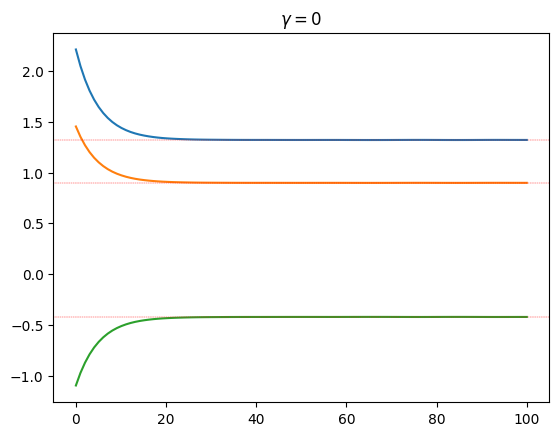

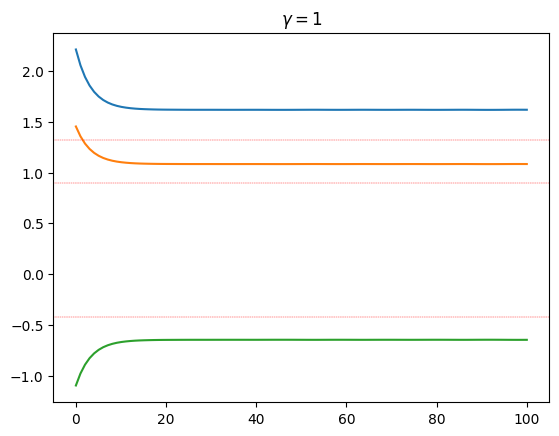

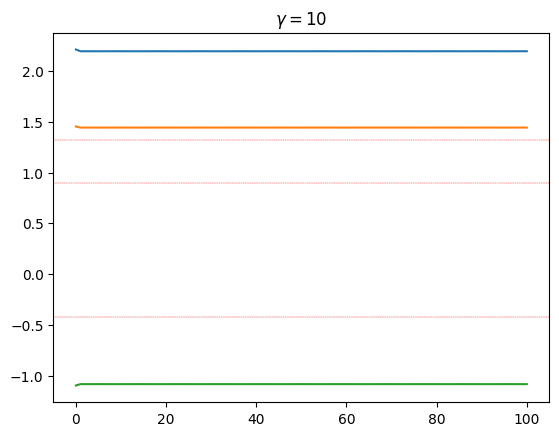

In [9]:
for gamma in [0, 1, 10]:
    sheaf = SheafBuilder(4, 3, seed = 4200)
    sheaf.augmentedConstantSheaf(gamma = gamma)

    x0 = sheaf.augmented_initial_state()
    x_null = sheaf.null_space_projector(x0)

    dynamic = SheafDynamic(
        sheaf.L_f, 
        sheaf.B, 
        0.1, 
        0.5, 
        sheaf.edges, 
        sheaf.V, 
        sheaf.d, 
        x0,
        U = sheaf.nodes[int(len(sheaf.nodes)/2):])

    trajectories_4 = dynamic.privateOpinionDynamicSolver()

    plt.plot(dynamic.time_points, trajectories_4[:, 0:3])
    for i in range(3):
        plt.axhline(y=x_null[i], 
                    color='r', 
                    linestyle='--', 
                    linewidth=0.3, 
                    label=f'x_null[{i}]')
    plt.title(f'$\gamma = {gamma}$')

    plt.show()
    #opinion_trajectory_plot(trajectories_4, dynamic.time_points, sheaf.d, range(sheaf.V), x_null, legend=False)

### Expression diffusion for "learning to lie" dynamics

In [10]:
sheaf = SheafBuilder(7, 3, seed = 4200)
x0 = sheaf.initial_state()

In [11]:
dynamic = SheafDynamic(
    sheaf.L_f, 
    sheaf.B, 
    0.1, 
    0.5, 
    int(len(sheaf.edges)), 
    sheaf.V, 
    sheaf.d, 
    x0)

In [12]:
trajectories_5, disagreement = dynamic.expressionDynamicSolver()

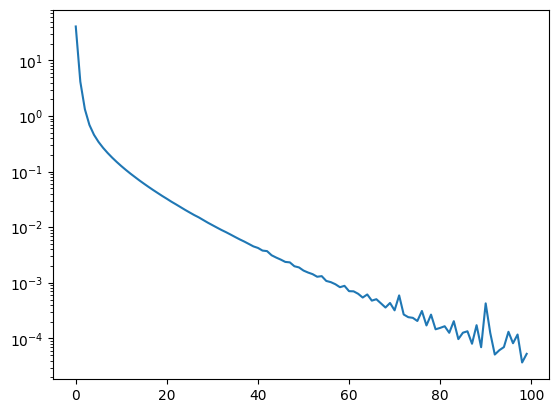

In [13]:
plt.plot(disagreement)
plt.yscale('log')

_______________

# Simplicial Complex Dynamics

In [14]:
SC = SimplicialSheafBuilder(11, 3, 3, seed = 420)
dynamic = SimplicialSheafDynamic(SC, 0.1, 0.1, 0.1)
xi_traj = dynamic.solver()

null = null_space(SC.L1)
proj = null @ null.T

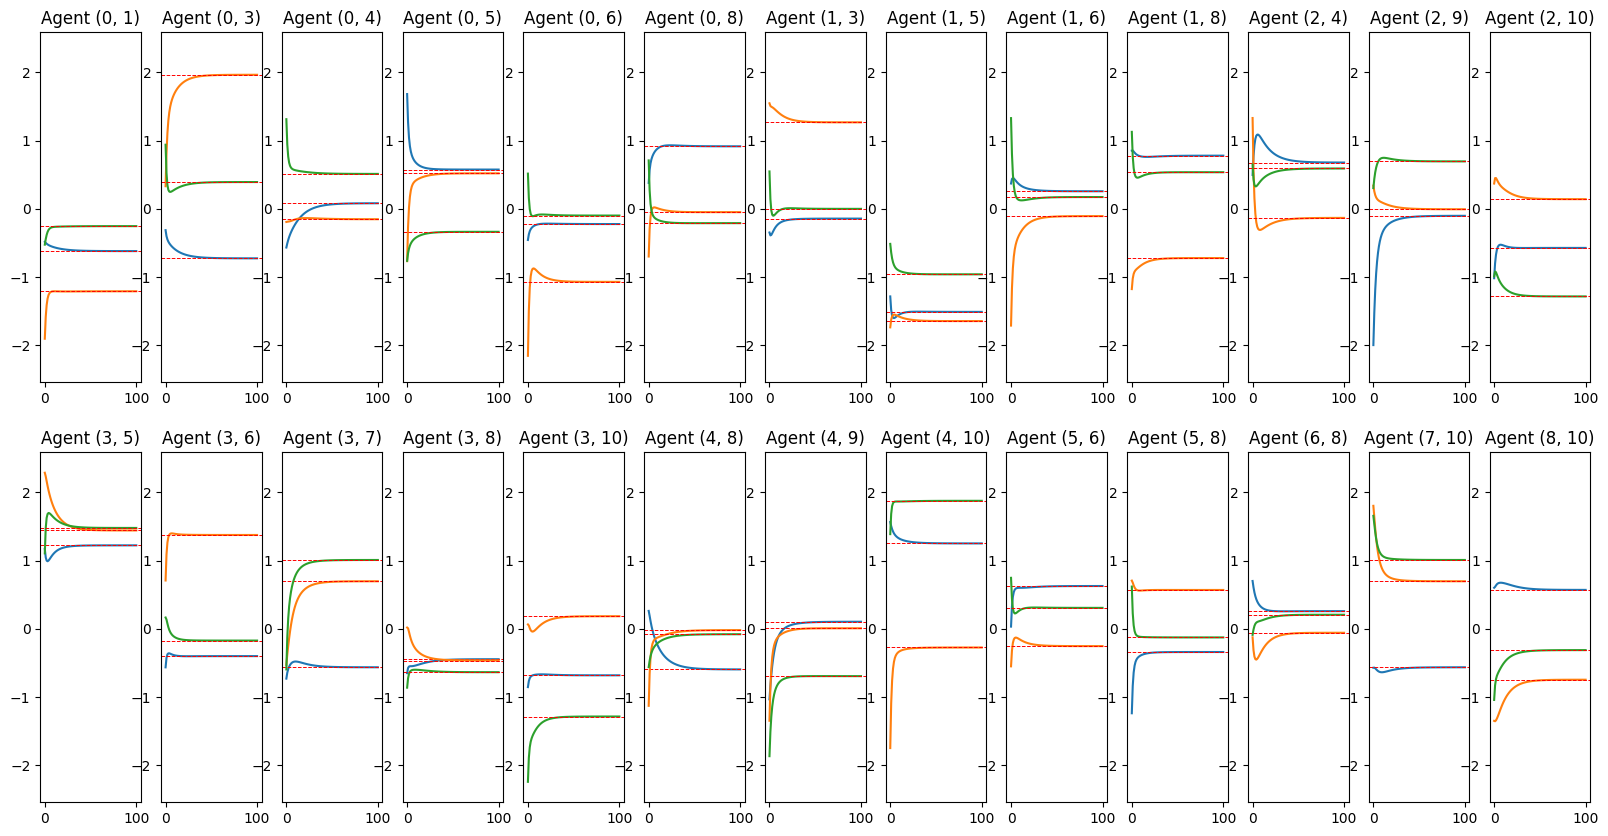

In [15]:
simplicial_opinion_trajectory_plot(xi_traj, dynamic.time_points, SC.d, SC.edges, proj @ xi_traj[0,:])

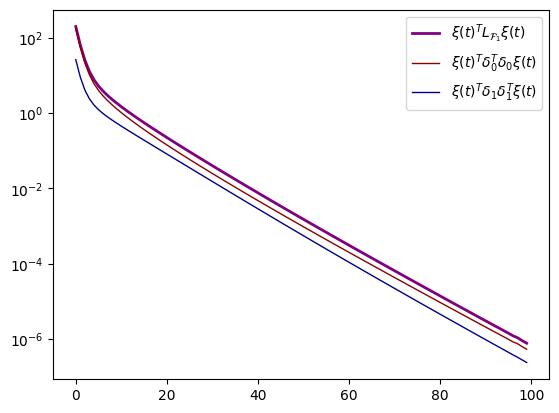

In [16]:
results_1 = np.einsum('ij,jk,ik->i', xi_traj, SC.L1, xi_traj)
results_2 = np.einsum('ij,jk,ik->i', xi_traj, SC.B0.T @ SC.B0, xi_traj)
results_3 = np.einsum('ij,jk,ik->i', xi_traj, SC.B1 @ SC.B1.T, xi_traj)

plt.plot(results_1, label = r'$\xi(t)^T L_{\mathcal{F}_1} \xi(t)$', linewidth = 2, color = 'purple')
plt.plot(results_2, label = r'$\xi(t)^T \delta_0^T\delta_0 \xi(t)$', linewidth = 1, color = 'darkred')
plt.plot(results_3, label = r'$\xi(t)^T \delta_1\delta_1^T \xi(t)$', linewidth = 1, color = 'darkblue')
plt.yscale('log')
plt.legend()
plt.show()

In [17]:
SC.triangles

[(2, 4, 10), (0, 5, 8), (1, 3, 6)]

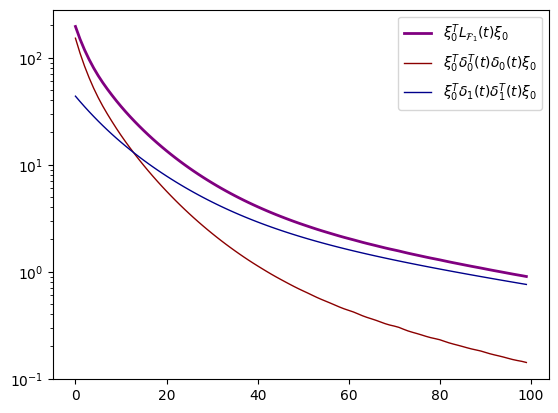

In [18]:
SC = SimplicialSheafBuilder(11, 3, 3, seed = 240)
dynamic = SimplicialSheafDynamic(SC, 0.1, 0.02, 0.01)
xi0, B0_traj, B1_traj = dynamic.expressionDynamicSolver()

disagreement_1 = xi0.T @ (B0_traj.transpose(0,2,1) @ B0_traj) @ xi0
disagreement_2 = xi0.T @ (B1_traj.transpose(0,2,1) @ B1_traj) @ xi0
disagreement_3 = disagreement_1 + disagreement_2

plt.plot(disagreement_3, label = r'$\xi_0^T L_{\mathcal{F}_1}(t) \xi_0$', linewidth = 2, color = 'purple')
plt.plot(disagreement_1, label = r'$\xi_0^T \delta_0^T(t)\delta_0(t)\xi_0$', linewidth = 1, color = 'darkred')
plt.plot(disagreement_2, label = r'$\xi_0^T \delta_1(t)\delta_1^T(t)\xi_0$', linewidth = 1, color = 'darkblue')
plt.yscale('log')
plt.legend()
plt.show()